In [6]:
import lvmnebular
import numpy as np

In [7]:
u=lvmnebular.simulation()
#u.loadsim('Bubble_v2_5e-14',900) #native simulation
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True) #voronoi simulation
u.loadsim('Bubble_v2_5e-14', 900, snbin=True) #snbin simulation


Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_linear_full_900_flux.fits
no.of bins: 119


In [8]:
#native simulation
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim
#u.fitlines(sys_vel=20, lines0= np.array([7319, 7320, 7330, 7331]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=True) #native sim

#voronoibin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim

#radbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=True, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=False) #radbin sim

#snbin sim
u.fitlines(sys_vel=20, lines0= np.array([9069,7320, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim


Fitting Emmission Lines: ['9069' '7320' '7331' '6731' '6717' '6584' '6563' '6548' '6312' '5755'
 '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729' '3726']
linefitfile: Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_linefits.fits
119
Fitting Line: 9069.60501855587
Fitting Line: 7320.488337835371
Fitting Line: 7331.48907167638
Fitting Line: 6731.449043984956
Fitting Line: 6717.44811000549
Fitting Line: 6584.439237200558
Fitting Line: 6563.437836231357
Fitting Line: 6548.436835539072
Fitting Line: 6312.421091313779
Fitting Line: 5755.383932273573
Fitting Line: 5007.334031084932
Fitting Line: 4959.330828869618
Fitting Line: 4861.324291013352
Fitting Line: 4363.29106802947
Fitting Line: 4069.2714544606724
Fitting Line: 4076.271921450406
Fitting Line: 3970.264849891588
Fitting Line: 3729.248772102199
Fitting Line: 3726.248571963742
Fitting Line: 9069.60501855587
Fitting Line: 7320.488337835371
Fitting Line: 7331.48907167638
Fitting Line: 6731.449043984956
Fitting Lin

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
GB TEST
(162, 12301)
(119, 12301)
169 [1.54673830e-27 3.69999996e+01 3.69999996e+01 3.69999996e+01
 3.69999996e+01 3.69999996e+01 3.69999996e+01 6.40858778e+01
 6.40858778e+01 6.40858780e+01 6.40858780e+01 6.40858780e+01
 6.40858780e+01 7.39999968e+01 7.39999968e+01 7.39999971e+01
 7.39999971e+01 7.39999971e+01 7.39999971e+01 9.78927913e+01
 9.78927913e+01 9.78927913e+01 9.78927913e+01 9.78927915e+01
 9.78927915e+01 9.78927915e+01 9.78927915e+01 9.78927921e+01
 9.78927921e+01 9.78927921e+01 9.78927921e+01 1.10999989e+02
 1.10999989e+02 1.10999990e+02 1.10999990e+02 1.10999990e+02
 1.10999990e+02 1.28171743e+02 1.28171743e+02

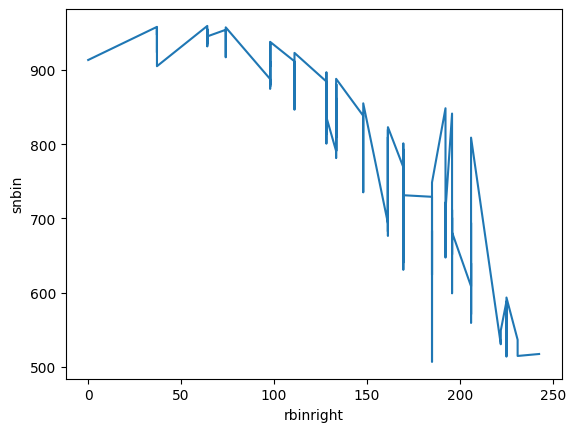

In [4]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
print(u.snbinned_flux, u.flux)

(119, 12301)


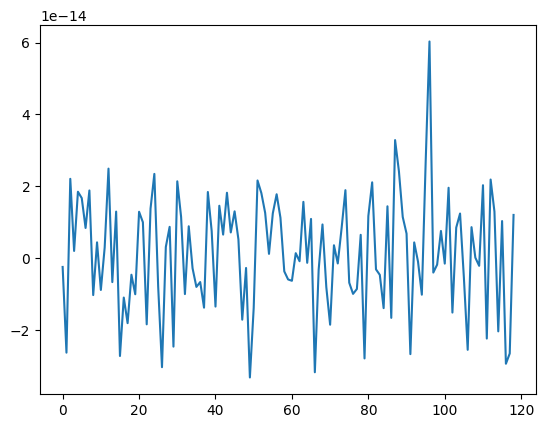

In [5]:
import matplotlib.pyplot as plt
print(np.shape(u.snbinned_flux))
plt.plot(u.snbinned_flux[:,0])

78
[[ 1.88423089e-14  8.18830985e-15 -1.22387435e-14 ...  2.06153060e-15
   1.64401440e-15 -7.84160317e-15]
 [ 1.00003319e-14 -2.76717299e-15  3.19812599e-15 ... -3.69921353e-15
  -2.96248757e-14 -3.90101617e-15]
 [-1.83954143e-14 -4.03355904e-15 -4.18680559e-14 ... -5.11214400e-16
  -9.01912890e-15 -1.12372058e-14]
 ...
 [ 1.52496153e-14  4.76286660e-14 -1.99361469e-14 ...  5.28573123e-16
  -1.11238669e-14 -4.97769720e-14]
 [ 2.47284442e-14 -4.92944444e-14  3.74178939e-14 ...  1.15654641e-14
  -3.67776014e-14 -2.21244684e-14]
 [ 8.69585369e-15  1.08212203e-14  6.88630468e-14 ... -6.23591331e-15
   1.27269654e-15  1.95426747e-14]]


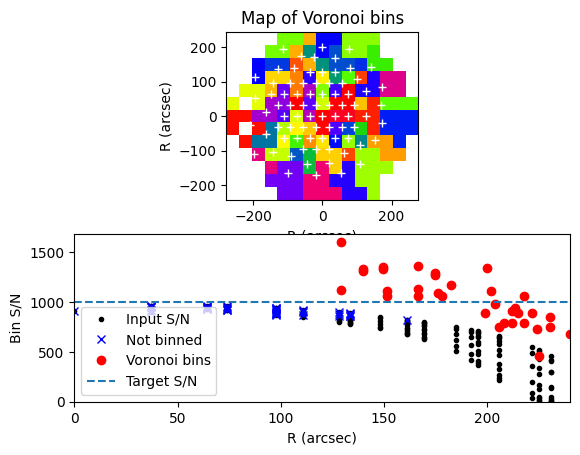

In [10]:


u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [9]:
u.runpyneb(niter=4, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:363: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


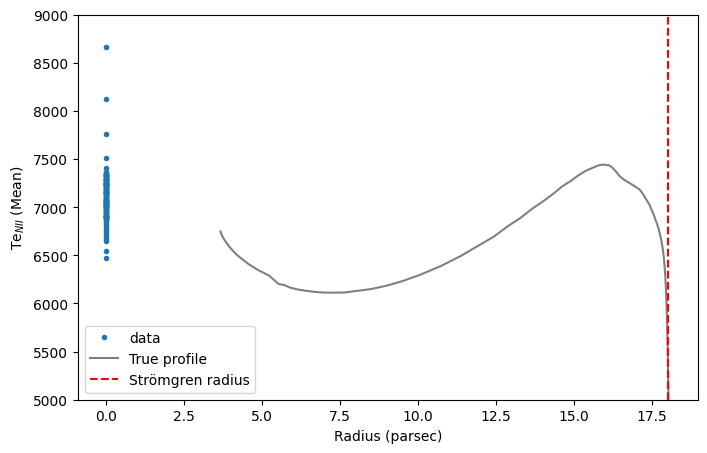

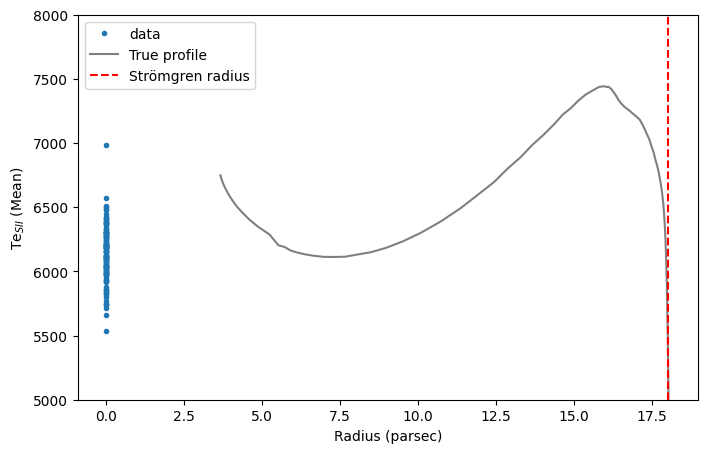

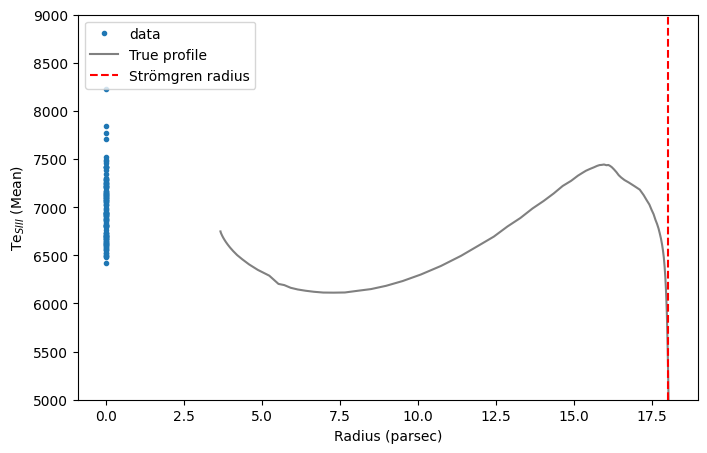

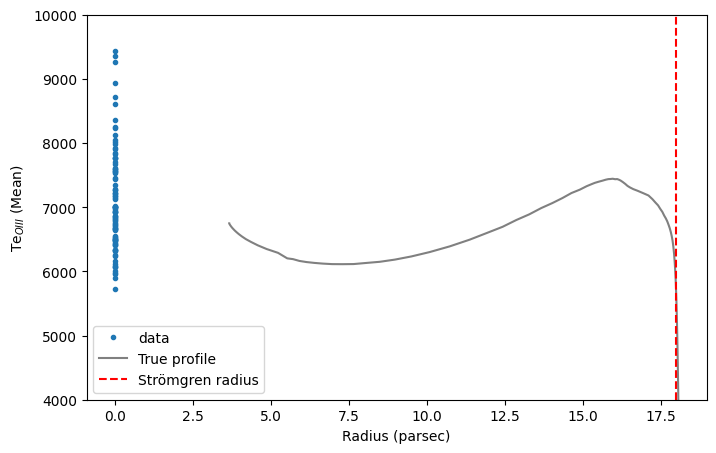

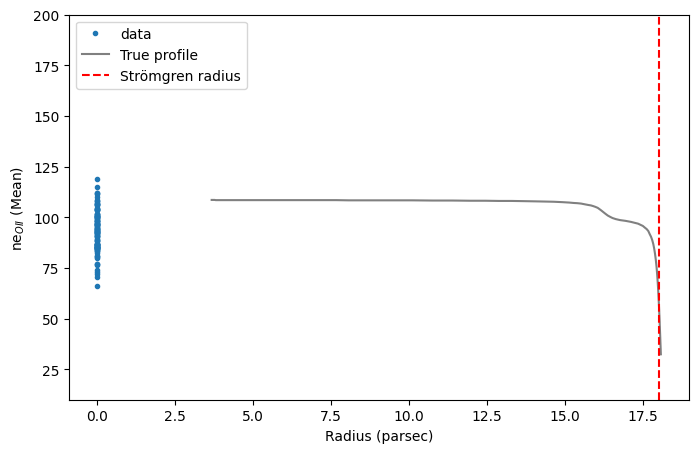

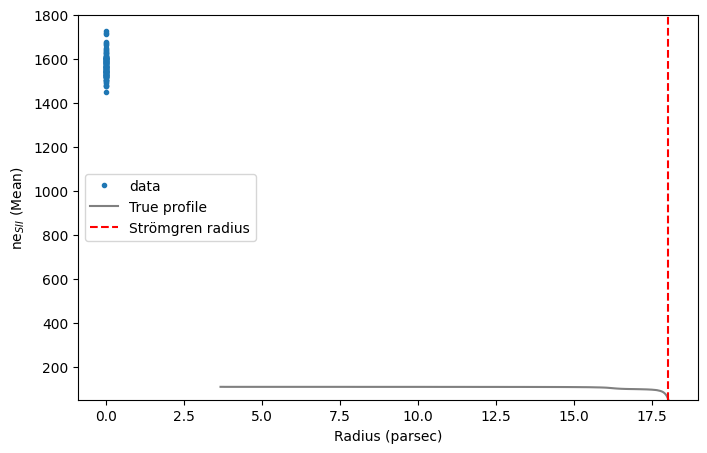

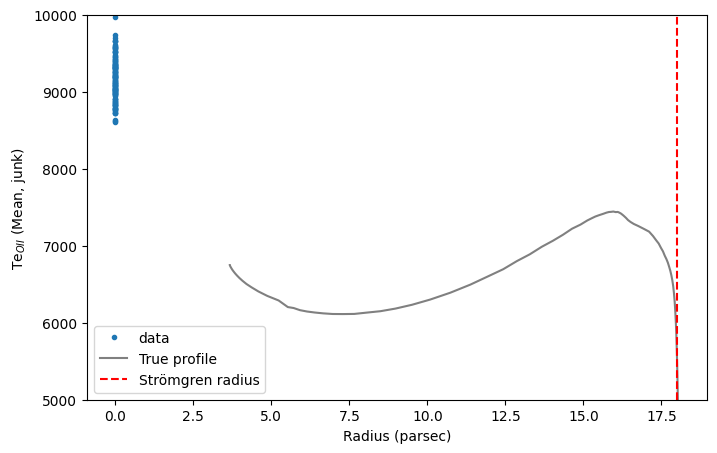

In [11]:
u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], 5000 , 9000, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=True, vorbin=False,  snbin=True)
u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=True, vorbin=False,  snbin=True)
u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], 5000 , 9000, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=True, vorbin=False,  snbin=True)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], 4000 , 10000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=True, vorbin=False,  snbin=True)
u.overplotprofile(u.linefitdict['neO2'], u.vals[2], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=True, vorbin=False,  snbin=True)
u.overplotprofile(u.linefitdict['neS2'], u.vals[2], 50 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=True, vorbin=False,  snbin=True)
u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], 5000 , 10000, title=r'Te$_{OII}$ (Mean, junk)', output='TeO2_junk', radbin=False, vorbin=False,  snbin=True)



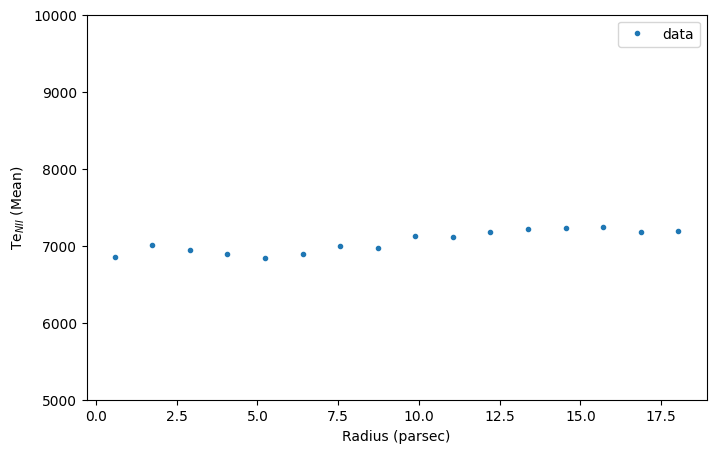

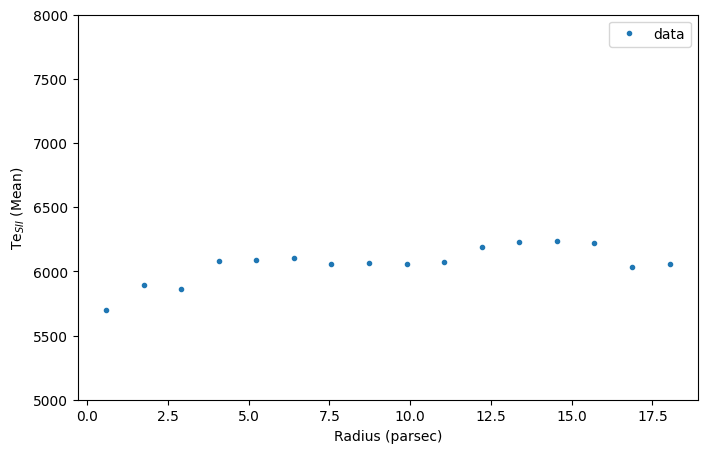

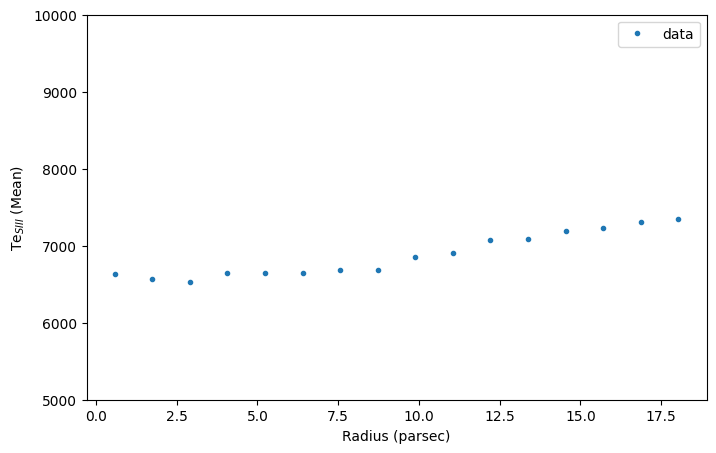

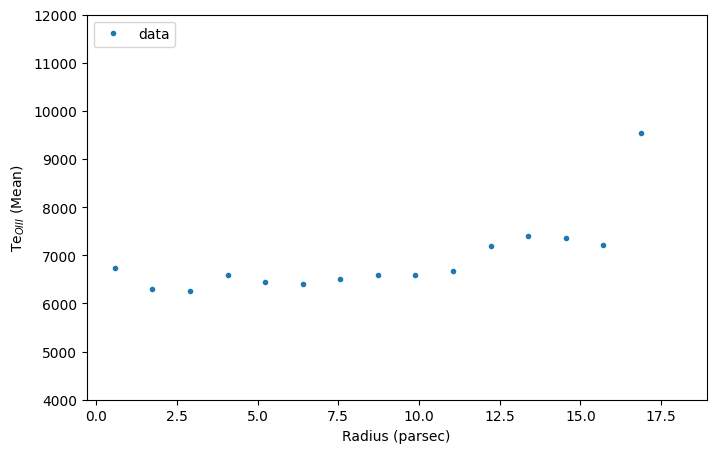

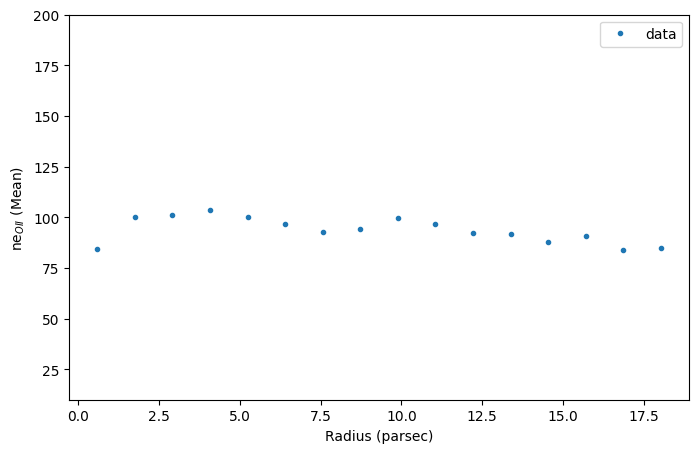

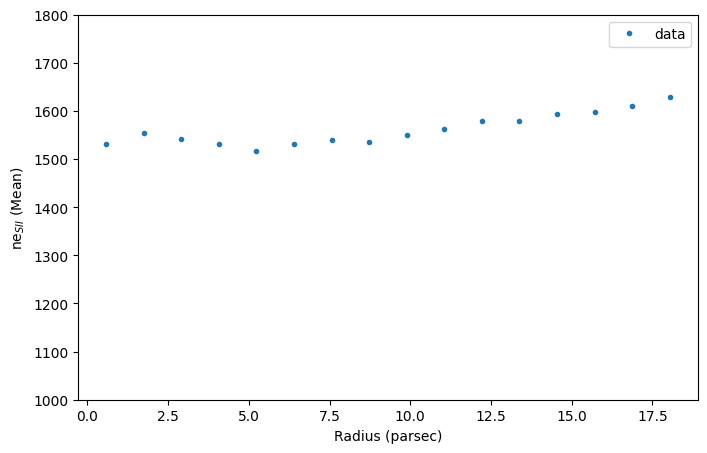

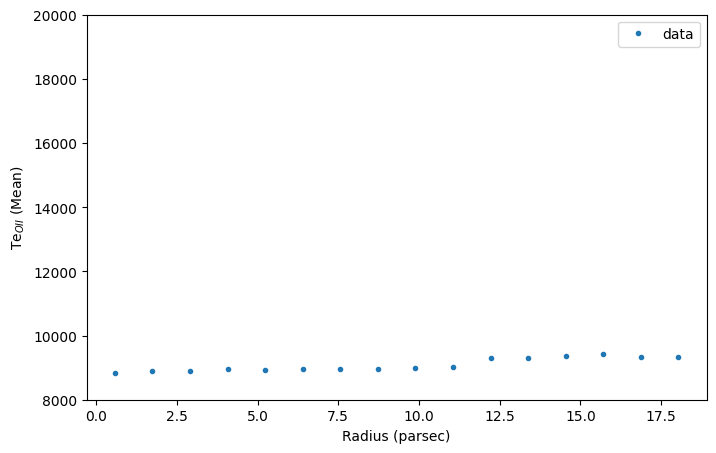

In [ ]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=True, snbin=False)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=True, snbin=False)
u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=True, snbin=False)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=True, snbin=False)



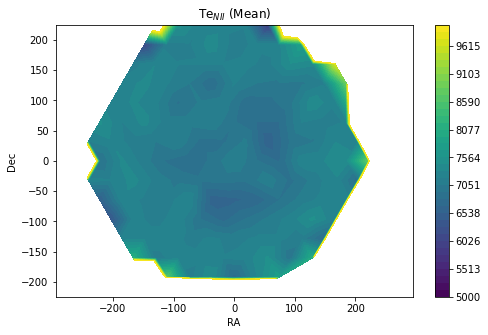

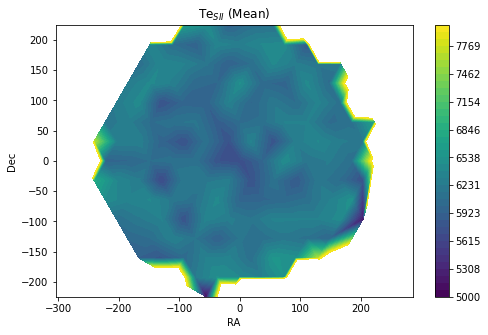

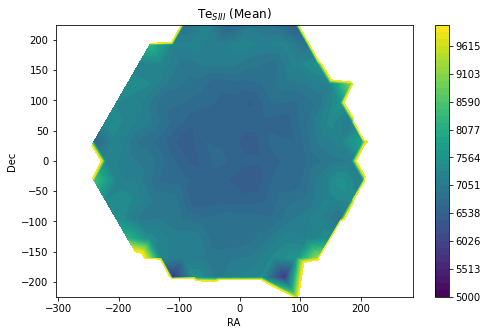

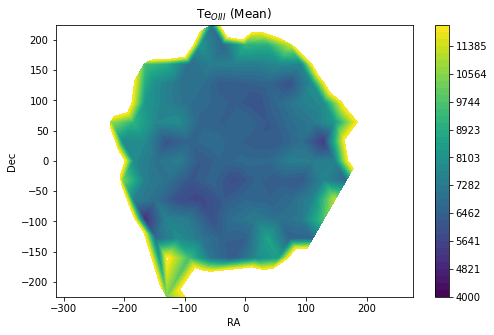

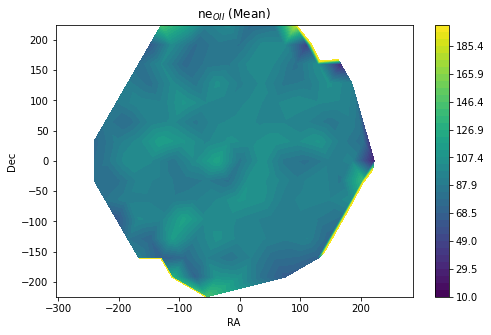

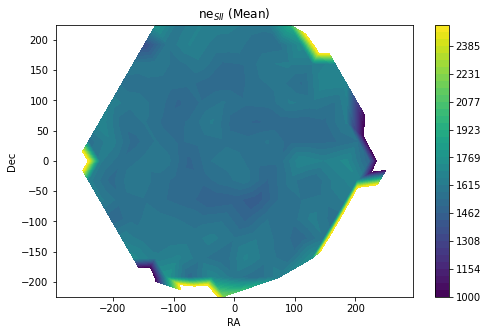

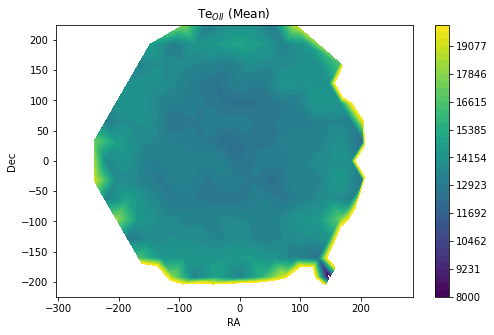

In [ ]:
#Make plot profiles
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)




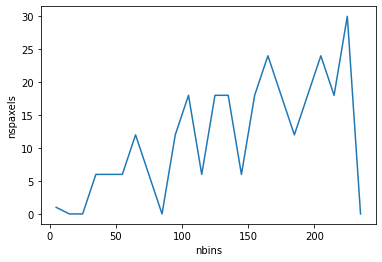

In [ ]:
u.radialbin(250, 10)

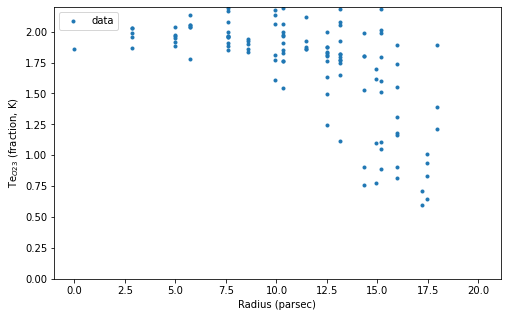

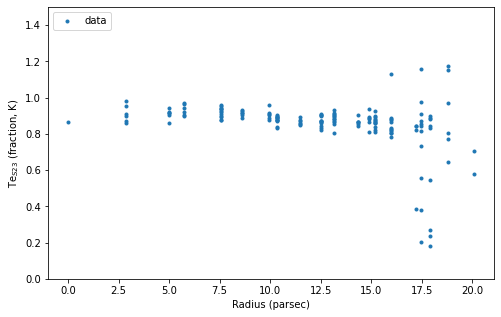

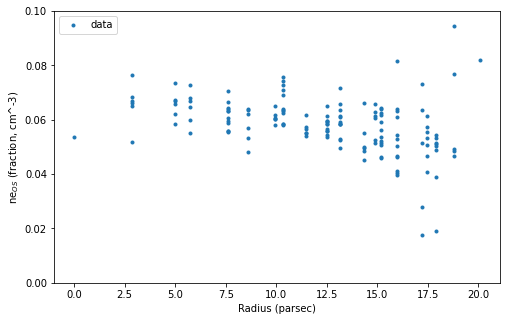

In [ ]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

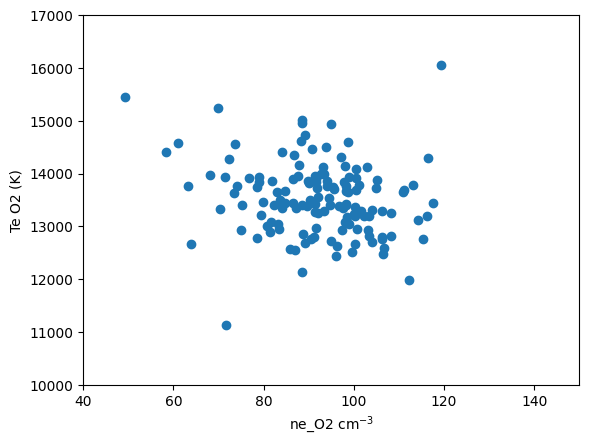

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 cm$^{-3}$')
plt.ylabel('Te O2 (K)')
plt.ylim(10000, 17000)
plt.xlim(40, 150)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

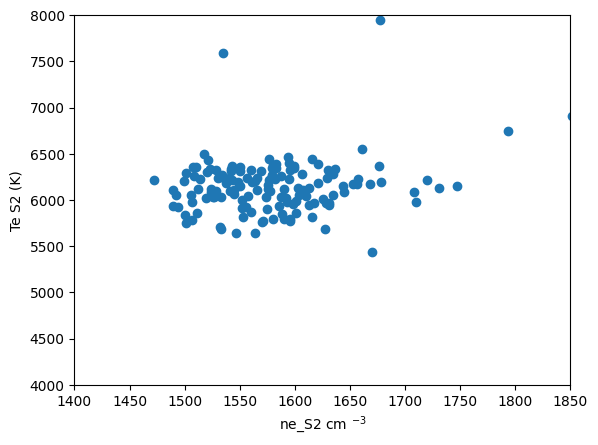

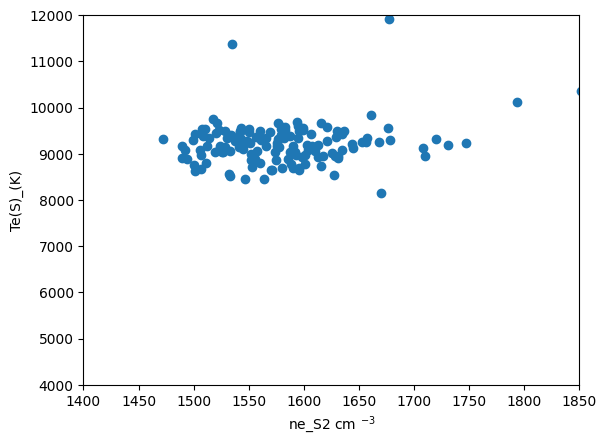

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2'])
plt.xlabel('ne_S2 cm $^{-3}$')
plt.ylabel('Te S2 (K)')
plt.ylim(4000, 8000)
plt.xlim(1400, 1850)
title='Te vs ne for SII.png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

fig, ax=plt.subplots()
ax.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2']+u.linefitdict['TeS2']/2 )
ax.set_xlabel('ne_S2 cm $^{-3}$')
ax.set_ylabel('Te(S)_(K)')
ax.set_ylim(4000, 12000)
ax.set_xlim(1400, 1850)
title='Te(S) vs ne(SII).png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=200)

